# Explore Merchant & Products

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
merchant_order_df = pd.read_pickle('merchant_order.pkl')
print(merchant_order_df.shape)

merchant_order_df.head()

(33819106, 7)


,order_id,user_id,order_number,order_hour_of_day,product_id,purchase_date,merchant
0,2539329,1,1,8,196,2019-02-13,L&M Markets (Hometown Grocers Co-op)
1,2539329,1,1,8,14084,2019-02-13,L&M Markets (Hometown Grocers Co-op)
2,2539329,1,1,8,12427,2019-02-13,L&M Markets (Hometown Grocers Co-op)
3,2539329,1,1,8,26088,2019-02-13,L&M Markets (Hometown Grocers Co-op)
4,2539329,1,1,8,26405,2019-02-13,L&M Markets (Hometown Grocers Co-op)


In [3]:
merchant_product_df = pd.read_pickle('merchant_product.pkl')
print(merchant_product_df.shape)

merchant_product_df.head()

(1439026, 8)


,merchant,product_id,product_name,aisle_id,department_id,aisle,department,price
0,L&M Markets (Hometown Grocers Co-op),196,Soda,77,7,soft drinks,beverages,3.08
1,Fairway Markets,196,Soda,77,7,soft drinks,beverages,3.08
2,Coleman's,196,Soda,77,7,soft drinks,beverages,3.08
3,Saskatoon Co-op,196,Soda,77,7,soft drinks,beverages,3.08
4,Asian Food Centre,196,Soda,77,7,soft drinks,beverages,3.08


In [6]:
all_order_df = merchant_order_df.merge(merchant_product_df[['merchant', 'product_id', 'product_name', 'price', 'aisle', 'department']], 
                                       on=['merchant', 'product_id'])
print(all_order_df.shape)

all_order_df.head()

(33819106, 11)


,order_id,user_id,order_number,order_hour_of_day,product_id,purchase_date,merchant,product_name,price,aisle,department
0,2539329,1,1,8,196,2019-02-13,L&M Markets (Hometown Grocers Co-op),Soda,3.08,soft drinks,beverages
1,2231262,31,17,11,196,2019-03-10,L&M Markets (Hometown Grocers Co-op),Soda,3.08,soft drinks,beverages
2,3058369,195,34,10,196,2019-02-25,L&M Markets (Hometown Grocers Co-op),Soda,3.08,soft drinks,beverages
3,2257155,951,3,20,196,2019-03-09,L&M Markets (Hometown Grocers Co-op),Soda,3.08,soft drinks,beverages
4,1121647,992,7,10,196,2019-03-08,L&M Markets (Hometown Grocers Co-op),Soda,3.08,soft drinks,beverages


In [44]:
all_order_df.to_pickle('all_order.pkl')

### Purchase Frequency Overview

The purpose of this check is just to understand an overview about purchase pattern, to see whether there is any abnormal pattern that might prevent a certain types of recommendations.

In [7]:
df_count = all_order_df[['product_id', 'order_number']].astype('str').drop_duplicates()\
          .groupby(['product_id'], as_index=False)['order_number']\
          .agg(['count']).reset_index()\
          .sort_values(['count'], ascending=False)

df_count.head()

,product_id,count
13666,22298,100
24895,32403,100
2391,1215,100
5227,14702,100
44282,5134,100


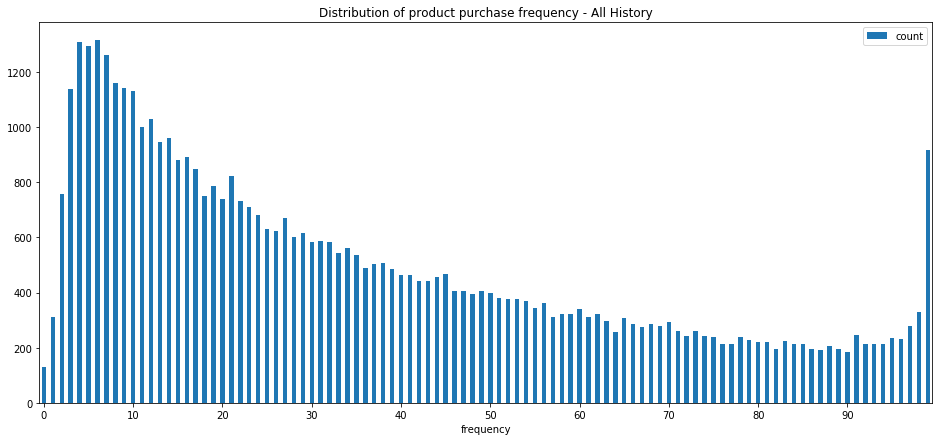

In [45]:
df_ct_ct = pd.DataFrame(df_count['count'].value_counts()).sort_index()
df_ct_ct['frequency'] = df_ct_ct.index

ax = df_ct_ct.plot.bar(x='frequency', y='count', rot=0, figsize=(16,7), xticks = np.arange(0, 100, step=10),
                      title='Distribution of product purchase frequency - All History')

The distribution here is showing:
* Most products are purchased within 10 times
* The number of products got purchased 100 times is also high

It seems that the data should allow to apply differemt types of recommendations such as popularity recommendations, similarity recommendations and so on.